In [45]:
!pip install pprint

ERROR: Could not find a version that satisfies the requirement pprint (from versions: none)
ERROR: No matching distribution found for pprint

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [46]:
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from scipy.io import wavfile

In [47]:
# create the signal 
duration = 10  # seconds
wav_raw_data = wavfile.read("output/oppa_output.wav")
fs = wav_raw_data[0]  # sample frequency in Hz
signal = wav_raw_data[1] / 2 ** 15  # normalize to [-1, 1]
signal.shape

(11113200,)

In [48]:
# Split the signal into chunks
chunk_size = fs // 5  # 1 second chunks
num_chunks = len(signal) // chunk_size
print("num_chunks", num_chunks)
chunks = np.array(np.split(signal[:num_chunks * chunk_size], num_chunks))

num_chunks 1260


In [49]:
pprint(chunks)
chunks.shape


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.02987671,  0.03039551,  0.03433228, ..., -0.03024292,
        -0.0296936 , -0.02890015],
       [-0.02740479, -0.02651978, -0.02609253, ...,  0.00424194,
         0.0043335 ,  0.00323486],
       [ 0.0010376 ,  0.00057983,  0.00213623, ..., -0.01321411,
        -0.01452637, -0.01501465]])


(1260, 8820)

In [50]:
# Compute the FFT for each chunk
fft_chunks = np.array([np.fft.fft(chunk) for chunk in chunks])
fft_chunks.shape

(1260, 8820)

In [51]:
# Compute the frequencies for the x-axis
frequencies = np.fft.fftfreq(chunk_size, 1 / fs)
frequencies

array([  0.,   5.,  10., ..., -15., -10.,  -5.])

In [52]:
# find the dominant frequency
dominant_frequencies = np.abs(fft_chunks)[0].argmax()
dominant_frequencies


0

(1260, 4410)


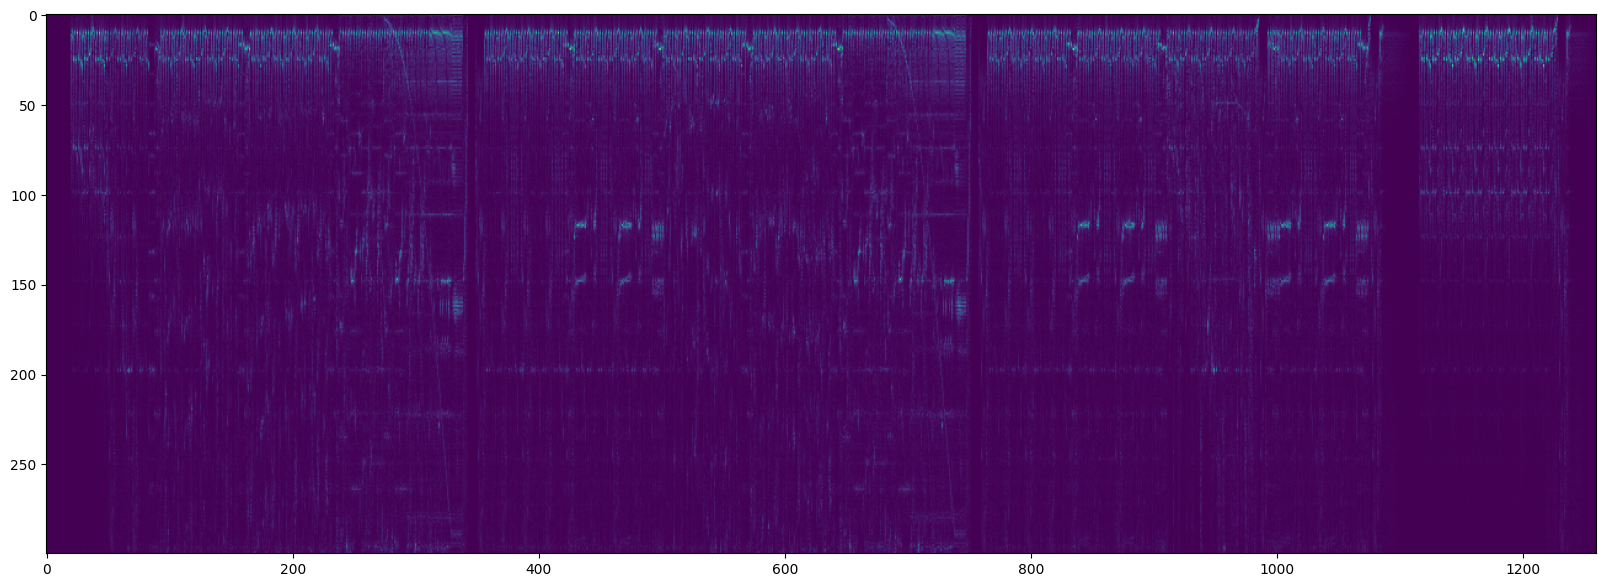

In [62]:
fft_mags = np.abs(fft_chunks)
fft_mags = np.array([fft_mag[:len(fft_mag) // 2] for fft_mag in fft_mags])
print(fft_mags.shape)
frequencies_chunk = frequencies[:len(frequencies) // 2]
fft_mags = fft_mags.T
fig = plt.figure(figsize=(20, 7))
plt.imshow(fft_mags[0:300, :], aspect='auto')


# decode the code

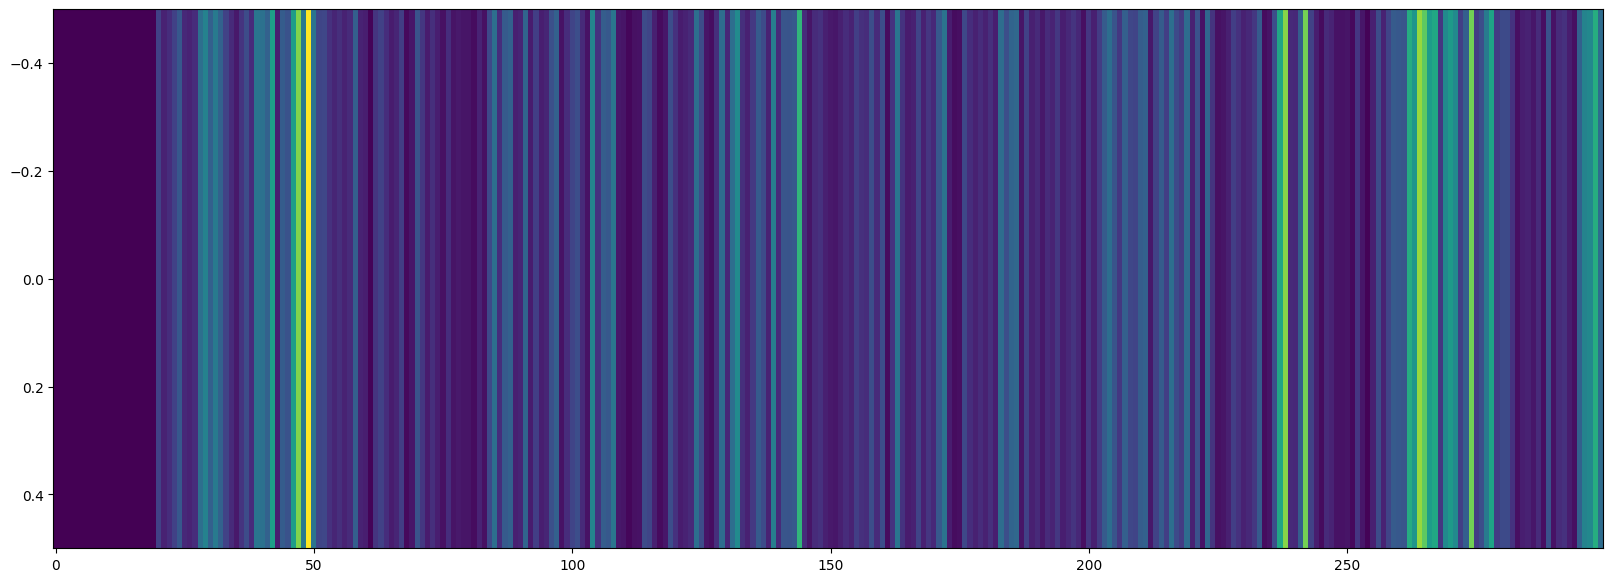

In [54]:
fig = plt.figure(figsize=(20, 7))
plt.imshow(fft_mags[100:101, :300], aspect='auto')

In [55]:
fft_mags[100:101, :100]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.64094306e-03, 6.16527364e-03,
        4.51320874e+01, 2.25252426e+01, 3.00845887e+01, 4.53867102e+01,
        6.41721005e+01, 2.67659179e+01, 2.31596966e+01, 2.98304940e+01,
        8.48228096e+01, 1.02593138e+02, 7.12747854e+01, 9.56236241e+01,
        7.30601607e+01, 4.55607906e+01, 2.85290441e+01, 1.62521495e+01,
        3.48441034e+01, 5.41004830e+01, 2.98575241e+01, 9.08686720e+01,
        8.67598964e+01, 7.24042338e+01, 1.30485749e+02, 1.88007457e+01,
        6.77652324e+01, 5.86379215e+01, 1.29131332e+02, 1.88417909e+02,
        9.40721118e+01, 2.32393556e+02, 8.94243710e+01, 4.83068828e+01,
        4.98767301e+01, 3.31929528e+01, 2.44643887e+01, 3.096685

In [56]:
binary = np.where(fft_mags[100:101, :150 - (150 % 8)] > 1000, 1, 0)

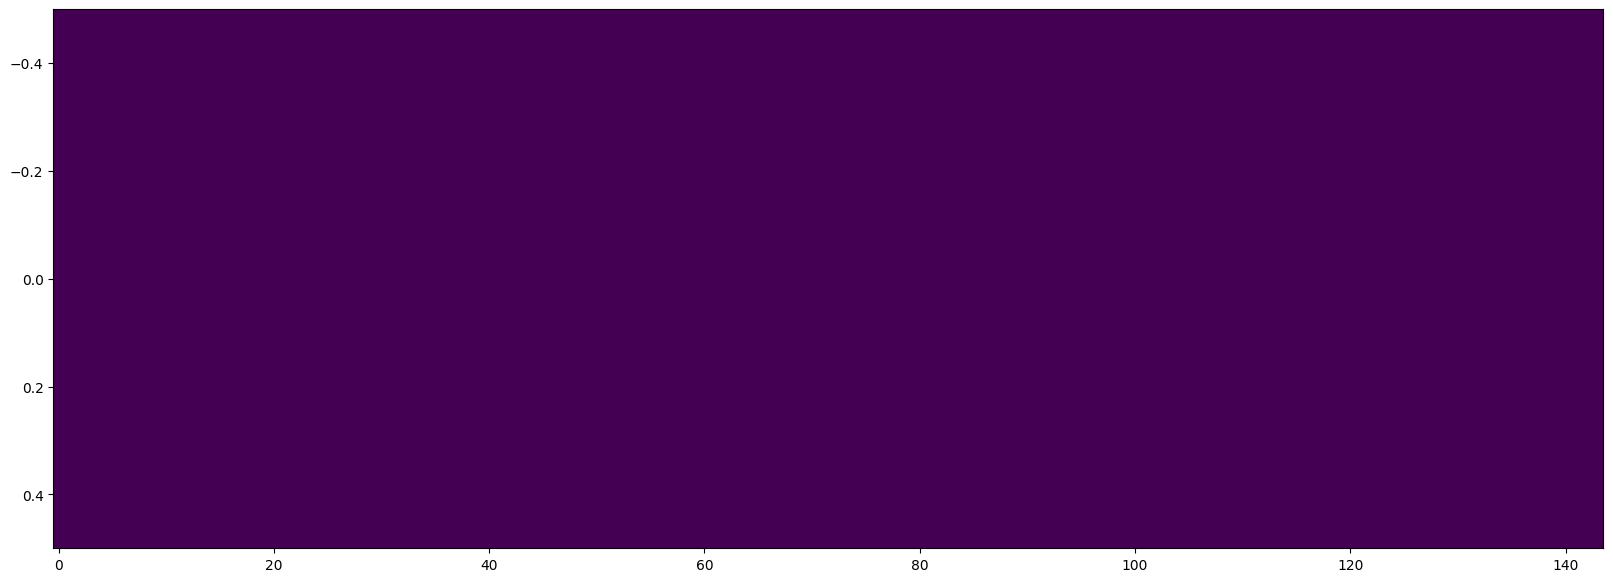

In [57]:
fig = plt.figure(figsize=(20, 7))
plt.imshow(binary, aspect='auto')


In [58]:
binary = list(binary[0])
binary

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [59]:
binary = "".join([str(bit) for bit in binary])
binary

'000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'

In [60]:
message = ""
for i in range(len(binary) // 8):
    byte: str = binary[i * 8: (i + 1) * 8]
    message += chr(int(byte, 2))
message

'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [61]:
help(int)

Help on class int in module builtins:

class int(object)
 |  int([x]) -> integer
 |  int(x, base=10) -> integer
 |
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |
 |  Built-in subclasses:
 |      bool
 |
 |  Methods defined here:
 |
 |  __abs__(self, /)
 |      abs(self)
 |
 |  __add__(self, value, /)
 |      Return self+value.
 |
 |  __and__(self, value, /)
 |      Return self&value.
 |
 |  __bool__(self, /)
 |      True if self else False
